# Manipulación y preparación de datos



## Importar los conjuntos de datos con los que se trabajará.


In [1]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Setting up tweaks for the visualization
sns.set(style="whitegrid")

In [7]:
# Be aware that the path that you are using is different to mine
path = r'/content/Thyroid_Diff.csv'
raw_Thyroid_df = pd.read_csv('../data/raw/Thyroid_Diff.csv')
raw_Thyroid_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [8]:
raw_Thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

Revisar valores nulos, validar que cada columna tiene cero valores faltantes

In [9]:
# Checking for missing values (nulls) in the dataset
null_values = raw_Thyroid_df.isnull().sum()

# Display the result to show how many null values exist per column
null_values

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

Recurrencia al cancer

In [10]:
recurred_counts = raw_Thyroid_df['Recurred'].value_counts()

recurred_counts

Recurred
No     275
Yes    108
Name: count, dtype: int64


### Hallazgos clave:
Edad (Age): La única columna numérica con 383 datos válidos.

Columnas categóricas: Varios campos tienen categorías con una alta frecuencia de un valor específico, como:


*   Género (Gender): La mayoría son mujeres (312 de 383).
*   Historial de Fumar (Hx Smoking): La mayoría no son fumadores (355 de 383).
*   Recurrencia (Recurred): La mayoría de los pacientes no han tenido recurrencia del cáncer (275 de 383).












In [11]:
raw_Thyroid_df.head().T

,0,1,2,3,4
Age,27,34,30,62,62
Gender,F,F,F,F,F
Smoking,No,No,No,No,No
Hx Smoking,No,Yes,No,No,No
Hx Radiothreapy,No,No,No,No,No
Thyroid Function,Euthyroid,Euthyroid,Euthyroid,Euthyroid,Euthyroid
Physical Examination,Single nodular goiter-left,Multinodular goiter,Single nodular goiter-right,Single nodular goiter-right,Multinodular goiter
Adenopathy,No,No,No,No,No
Pathology,Micropapillary,Micropapillary,Micropapillary,Micropapillary,Micropapillary
Focality,Uni-Focal,Uni-Focal,Uni-Focal,Uni-Focal,Multi-Focal


In [12]:
raw_Thyroid_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,383.0,40.866841,15.134494,15.0,29.0,37.0,51.0,82.0


## Realizar tareas de limpieza de datos, eliminando valores nulos o inconsistentes.


Revisión de filas duplicadas

In [13]:
# Check for duplicated rows in the dataset
duplicate_rows = raw_Thyroid_df.duplicated().sum()

# Display the number of duplicated rows
duplicate_rows

np.int64(19)

Analisis de las filas duplicadas

In [14]:
# Display the duplicated rows to analyze them
duplicated_data = raw_Thyroid_df[raw_Thyroid_df.duplicated(keep=False)]

# Show the duplicated rows
print(duplicated_data)

     Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
8     51      F      No         No              No        Euthyroid   
9     40      F      No         No              No        Euthyroid   
22    36      F      No         No              No        Euthyroid   
32    36      F      No         No              No        Euthyroid   
38    40      F      No         No              No        Euthyroid   
40    51      F      No         No              No        Euthyroid   
61    35      F      No         No              No        Euthyroid   
66    35      F      No         No              No        Euthyroid   
67    51      F      No         No              No        Euthyroid   
69    51      F      No         No              No        Euthyroid   
73    29      F      No         No              No        Euthyroid   
77    29      F      No         No              No        Euthyroid   
106   26      F      No         No              No        Euthyroid   
110   

Después de verificar que no hay diferencias entre los registros duplicados, se procede a eliminarlas ya que no aportan información nueva o única al análisis

In [15]:
# Eliminar filas duplicadas
thyroid_df_clean = raw_Thyroid_df.drop_duplicates()

# Verificar el número de filas después de eliminar duplicados
thyroid_df_clean.shape[0]

364

Las filas duplicadas han sido eliminadas. Ahora el dataset tiene 364 filas (en lugar de 383).

## Realizar transformaciones necesarias para preparar los datos para el análisis y modelado.

Muchas de las columnas en nuestro dataset son categóricas. Necesitamos convertirlas a un formato numérico para que puedan ser utilizadas en modelos de machine learning. Podemos hacerlo usando técnicas como One-Hot Encoding o Label Encoding.

Aplicar One-Hot Encoding a las variables categóricas para convertirlas en variables numéricas.

In [16]:
# Applying One-Hot Encoding to the categorical variables
thyroid_df_encoded = pd.get_dummies(thyroid_df_clean, drop_first=True)

# Display the encoded DataFrame's first few rows to ensure encoding worked properly
thyroid_df_encoded.head()

,Age,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,...,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Recurred_Yes
0,27,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,34,False,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,30,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,62,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,62,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False


Aplicado One-Hot Encoding a las variables categóricas, convirtiéndolas en variables binarias para que puedan ser usadas en el análisis y modelado. Ahora, el DataFrame contiene 41 columnas, con las variables categóricas convertidas en 0 y 1 (como por ejemplo, Gender_M o Recurred_Yes).

Revisar si hay necesidad de normalizar la variable numérica (Age), en caso de usar modelos que sean sensibles a la escala de los datos y dividir el dataset en conjuntos de entrenamiento y prueba, si estamos preparando los datos para un modelo predictivo.

In [17]:
# Primero, realizamos la normalización de la variable numérica 'Age'
from sklearn.preprocessing import StandardScaler

# Inicializamos el normalizador
scaler = StandardScaler()

# Aplicamos la normalización a la columna 'Age'
thyroid_df_encoded['Age'] = scaler.fit_transform(thyroid_df_encoded[['Age']])

# Ahora dividimos el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Supongamos que 'Recurred_Yes' es nuestra variable objetivo
X = thyroid_df_encoded.drop(columns=['Recurred_Yes'])
y = thyroid_df_encoded['Recurred_Yes']

# Dividimos los datos en un 80% para entrenamiento y un 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificamos el tamaño de los conjuntos de entrenamiento y prueba
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((291, 40), (73, 40), (291,), (73,))

La normalización de la variable Age se ha completado, y los datos han sido divididos en conjuntos de entrenamiento y prueba:


Conjunto de entrenamiento: 291 observaciones y 40 características.
Conjunto de prueba: 73 observaciones y 40 características.

Transformaciones realizadas hasta este punto:


1.   Codificación de variables categóricas:
Se aplicó One-Hot Encoding a todas las variables categóricas, convirtiéndolas en variables binarias (0 o 1). Esto fue necesario para poder utilizar estas variables en modelos de machine learning, que requieren datos numéricos.
Por ejemplo, la variable Gender (originalmente con valores "M" y "F") se convirtió en una columna binaria llamada Gender_M, donde "M" es representado por 1 y "F" por 0.
2.   Normalización de la variable numérica:
Se aplicó StandardScaler para normalizar la columna Age. Esto transformó la variable Age para que tenga una media de 0 y una desviación estándar de 1, lo cual es útil en modelos que son sensibles a la escala de los datos (como regresión logística o SVM).
3.   División del dataset en entrenamiento y prueba:
Se realizó la división en dos conjuntos: uno de entrenamiento (80%) y otro de prueba (20%), lo que es esencial para validar los modelos y evitar sobreajuste.




# Exploración y preprocesamiento de datos



## Realizar análisis exploratorio de datos (EDA) utilizando visualizaciones y estadísticas descriptivas.


Crear gráficos de distribución y correlación para las variables más importantes.

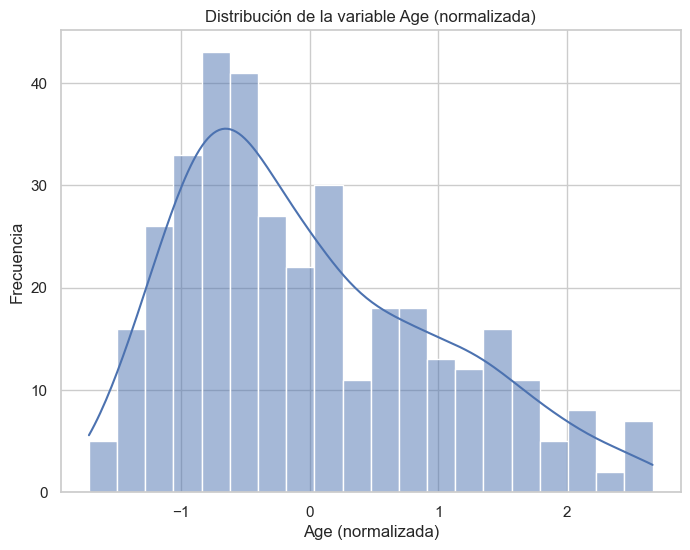

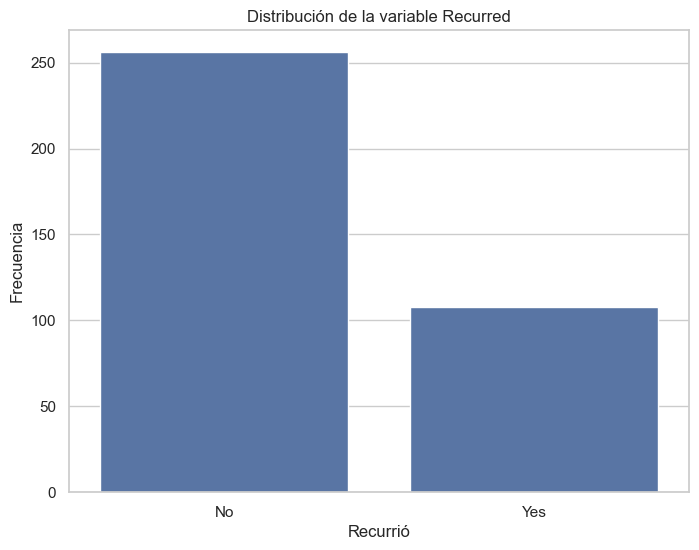

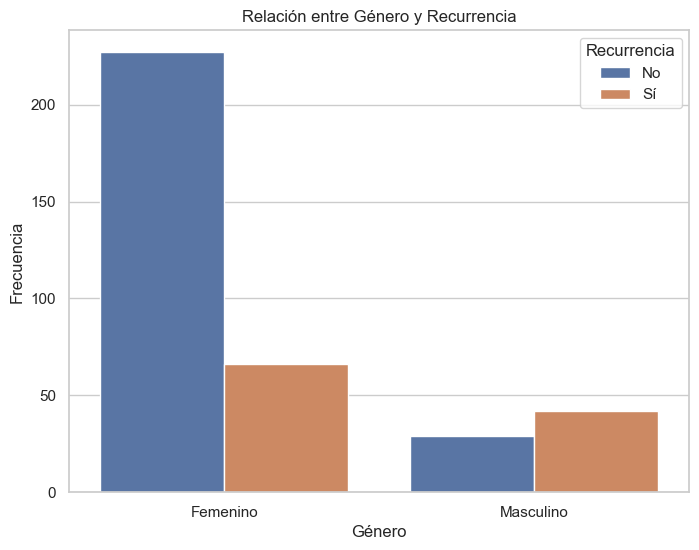

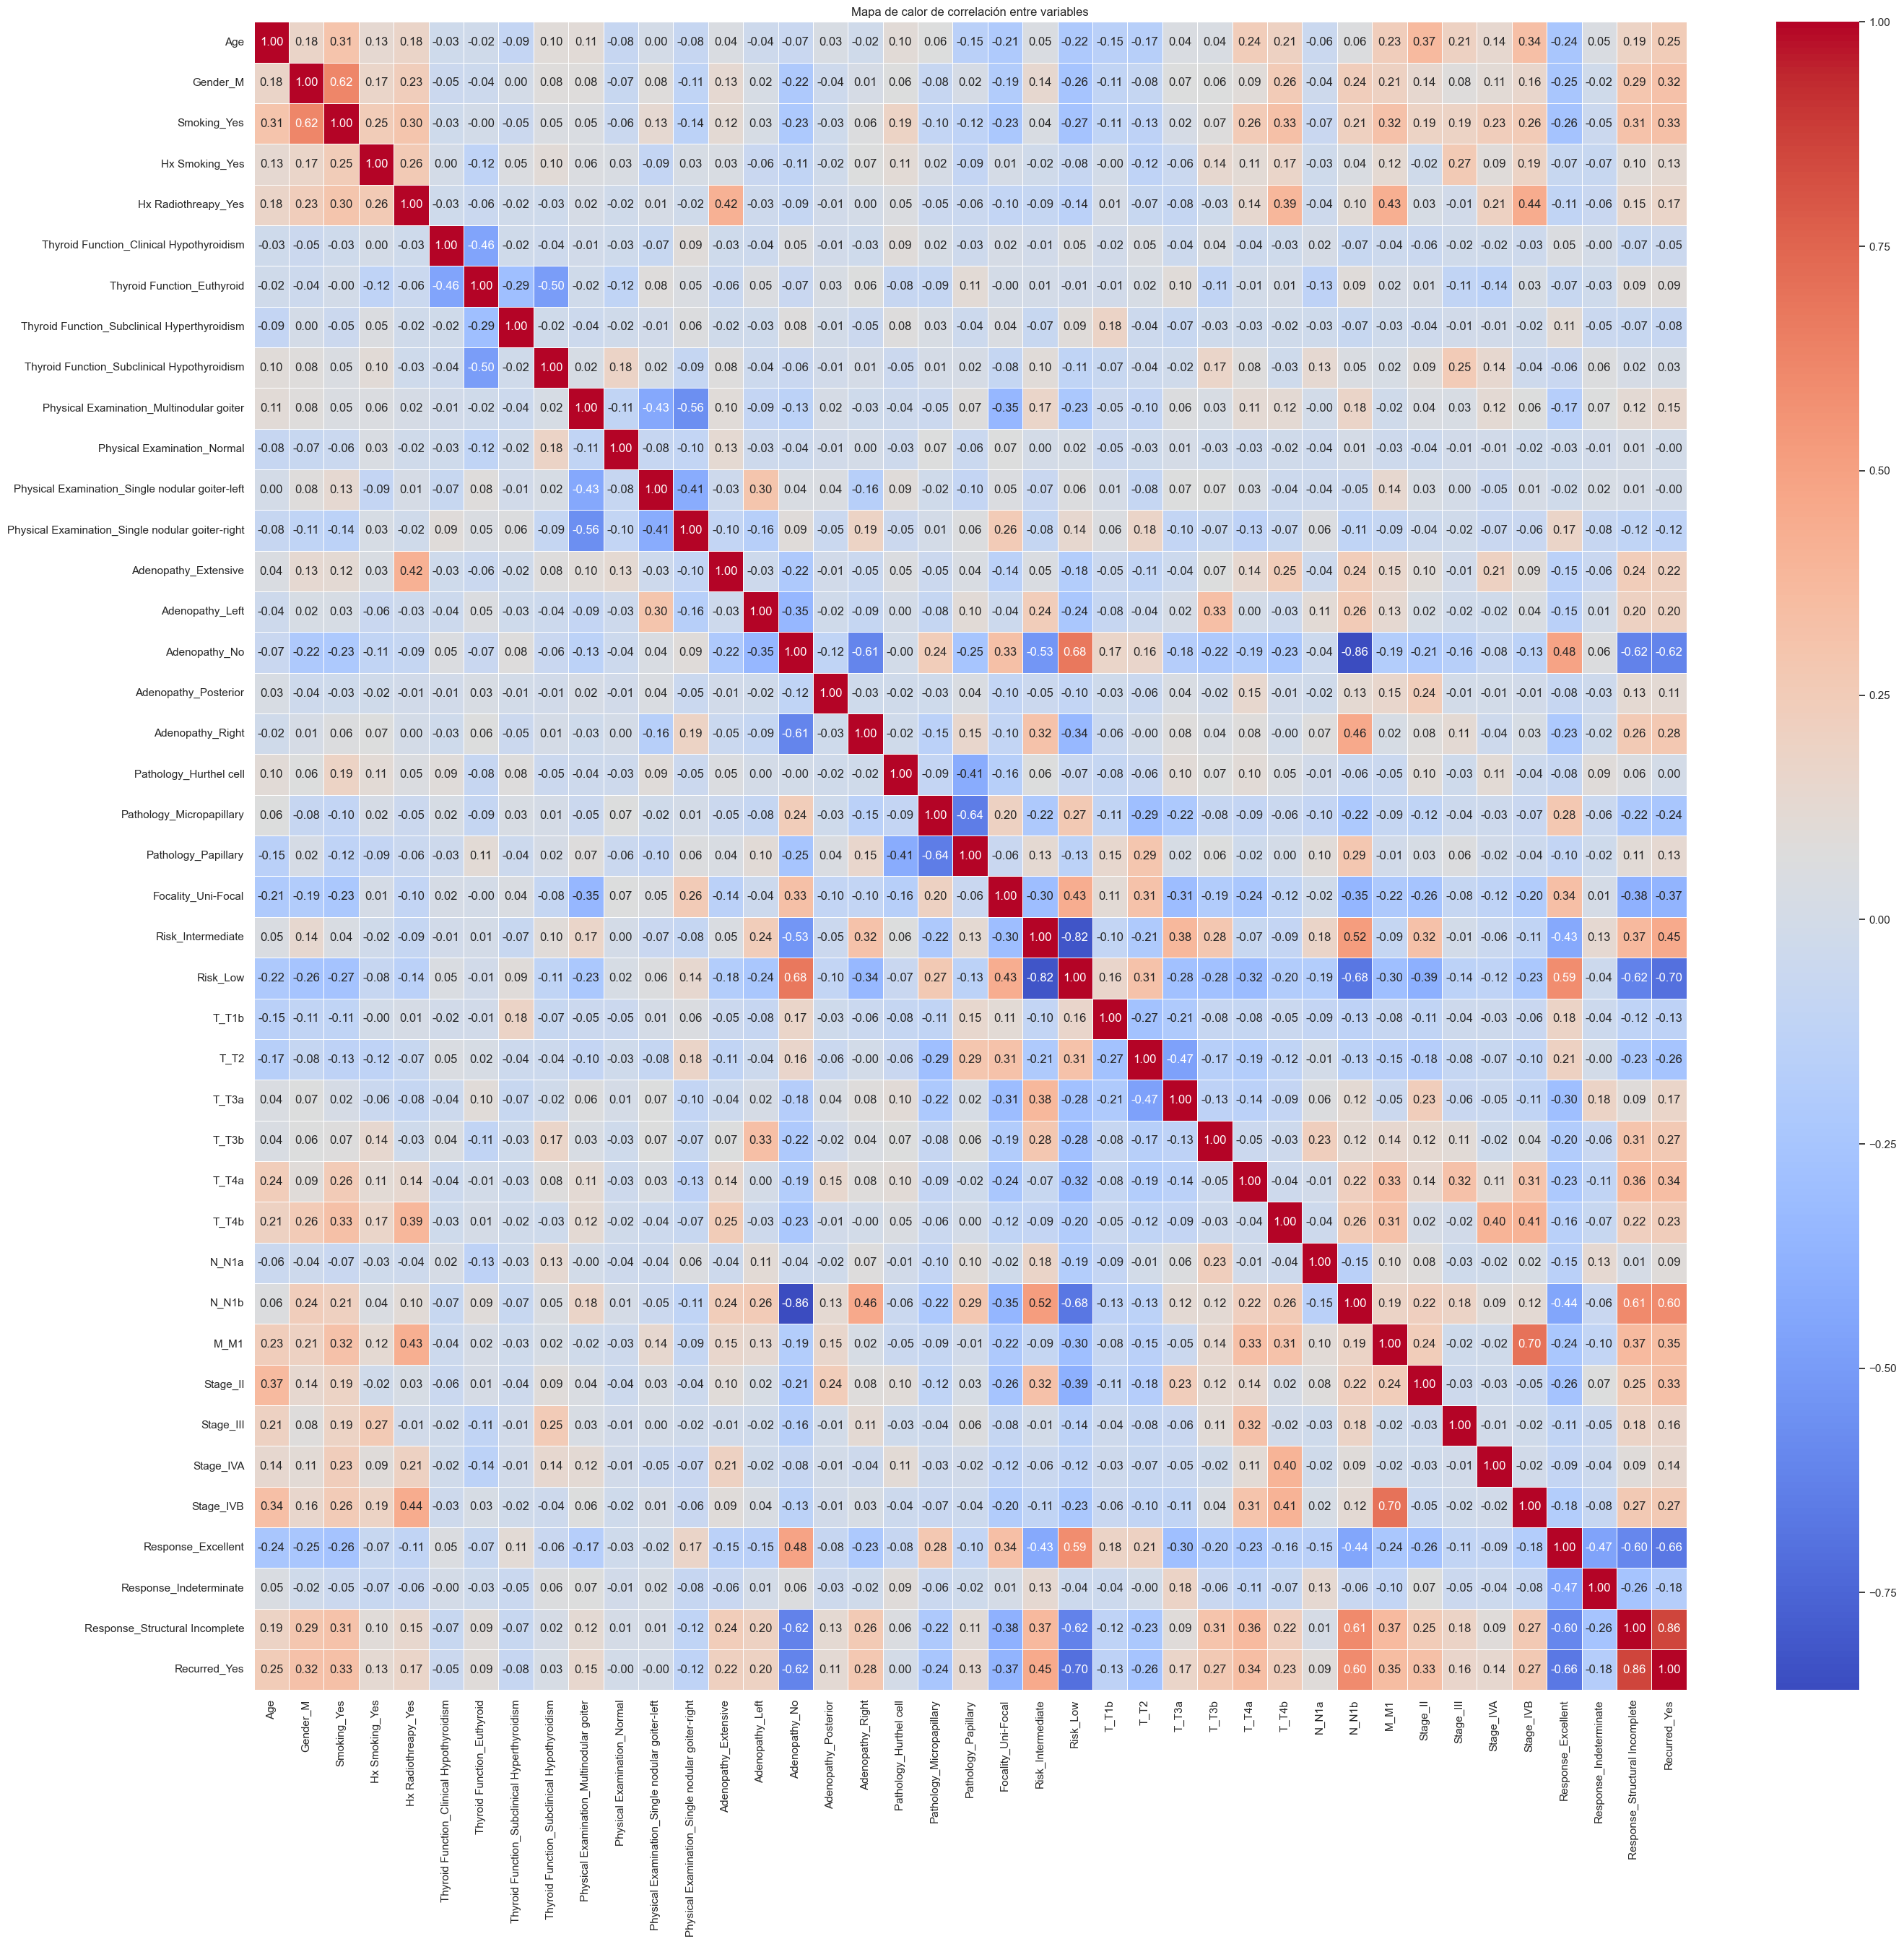

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set(style="whitegrid")

# 1. Distribución de la variable 'Age' después de la normalización
plt.figure(figsize=(8, 6))
sns.histplot(thyroid_df_encoded['Age'], kde=True, bins=20)
plt.title('Distribución de la variable Age (normalizada)')
plt.xlabel('Age (normalizada)')
plt.ylabel('Frecuencia')
plt.show()

# 2. Distribución de la variable objetivo 'Recurred'
plt.figure(figsize=(8, 6))
sns.countplot(x='Recurred_Yes', data=thyroid_df_encoded)
plt.title('Distribución de la variable Recurred')
plt.xlabel('Recurrió')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# 3. Relación entre 'Gender' y la recurrencia de cáncer
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender_M', hue='Recurred_Yes', data=thyroid_df_encoded)
plt.title('Relación entre Género y Recurrencia')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['Femenino', 'Masculino'])
plt.legend(title="Recurrencia", loc='upper right', labels=['No', 'Sí'])
plt.show()

# 4. Mapa de calor de correlación entre variables
plt.figure(figsize=(32, 30))
correlation_matrix = thyroid_df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de correlación entre variables')
plt.show()

Hallazgos EDA:


1.  Distribución de la variable Age (normalizada): La distribución parece ser unimodal, lo que indica que la mayoría de los pacientes están concentrados en una cierta edad media.
2.  Distribución de la variable Recurred: La mayoría de los pacientes no han tenido recurrencia del cáncer.
3.  Relación entre Gender y recurrencia de cáncer: No parece haber una gran diferencia en las tasas de recurrencia entre géneros (femenino y masculino), pero esto puede requerir análisis más profundos.
4.  Mapa de calor de correlación entre variables: El mapa de calor muestra la correlación entre las variables numéricas. Aunque algunas variables tienen correlaciones leves, no parece haber correlaciones extremadamente altas.


## Aplicar técnicas de preprocesamiento como normalización, codificación de variables categóricas y reducción de dimensionalidad.


Aplicar PCA (Análisis de Componentes Principales) para reducir el número de variables manteniendo la mayor cantidad de varianza posible. Esto ayudará a simplificar el modelo en el futuro.

In [19]:
from sklearn.decomposition import PCA

# Aplicamos PCA para reducir la dimensionalidad, primero probamos con que 95% de la varianza se mantenga
pca = PCA(n_components=0.95)  # Retener el 95% de la varianza
X_pca = pca.fit_transform(X)

# Mostrar el número de componentes resultantes
n_components = X_pca.shape[1]

# Mostrar los resultados del PCA
n_components

22

Después de aplicar PCA (Análisis de Componentes Principales), el número de componentes se ha reducido a 22, manteniendo el 95% de la varianza de los datos originales. Esto nos permite trabajar con un conjunto de datos más manejable sin perder mucha información.

# Versionado de datos



# Construcción, ajuste y evaluación de Modelos de Machine Learning

## Seleccionar algoritmos de Machine Learning adecuados para resolver el problema planteado.


Dado que el problema es de clasificación binaria (predecir si habrá recurrencia o no), algunos algoritmos adecuados serían:



Regresión Logística.

Árbol de Decisión.

Random Forest.

Support Vector Machines (SVM).

K-Nearest Neighbors (KNN).

Se selecciona:

Regresión Logística.

Árbol de Decisión.

Random Forest.

## Entrenar los modelos utilizando los datos preprocesados.


In [20]:
# Import necessary libraries for machine learning models and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Diccionario para almacenar los resultados de los modelos
model_results = {}

# Fase 2: Entrenamiento de los modelos
# 1. Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
model_results['Logistic Regression'] = accuracy_score(y_test, y_pred_log_reg)

# 2. Árbol de Decisión
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
model_results['Decision Tree'] = accuracy_score(y_test, y_pred_tree)

# 3. Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
model_results['Random Forest'] = accuracy_score(y_test, y_pred_rf)

# Mostrar los resultados de accuracy iniciales
print(model_results)

{'Logistic Regression': 0.9452054794520548, 'Decision Tree': 0.9452054794520548, 'Random Forest': 0.958904109589041}


## Realizar ajustes de hiperparámetros para optimizar el rendimiento del modelo.


Randomized Search: Explora combinaciones aleatorias de hiperparámetros en un espacio definido.

Hiperparámetros a ajustar para Random Forest:




n_estimators: Número de árboles en el bosque.


max_depth: Profundidad máxima de los árboles.


min_samples_split: Número mínimo de muestras para dividir un nodo.


min_samples_leaf: Número mínimo de muestras en una hoja.

In [21]:
from sklearn.model_selection import RandomizedSearchCV

# Definimos el espacio de hiperparámetros para Random Forest
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inicializamos el modelo Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Aplicamos RandomizedSearchCV con validación cruzada
random_search_rf = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_dist,
                                      n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Entrenamos el modelo de Random Forest con búsqueda de hiperparámetros
random_search_rf.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para Random Forest:")
print(random_search_rf.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros para Random Forest:
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': False}


d:\Users\Israel\Downloads\Maestria\Trimestre_5\MLOps\ProyectoML\Fase1Test\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Hiper parámetros para Regresión Logística:




C: Inverso de la regularización, cuanto más grande es, menos regularización.


solver: Algoritmos utilizados para optimizar el modelo.


penalty: Tipo de regularización (L1 o L2).

In [22]:
from sklearn.model_selection import GridSearchCV

# Espacio de hiperparámetros para Regresión Logística
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2']  # Solo L2 soportado para los solvers 'newton-cg', 'lbfgs'
}

# Inicializamos el modelo Regresión Logística
log_reg = LogisticRegression(max_iter=1000)

# Aplicamos Grid Search con validación cruzada
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg,
                                   cv=5, verbose=2, n_jobs=-1)

# Entrenamos el modelo de Regresión Logística con búsqueda de hiperparámetros
grid_search_log_reg.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para Regresión Logística:")
print(grid_search_log_reg.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Mejores hiperparámetros para Regresión Logística:
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


Hiper parámetros para Árbol de Decisión:



max_depth: Profundidad máxima del árbol.


min_samples_split: Número mínimo de muestras requeridas para dividir un nodo.


min_samples_leaf: Número mínimo de muestras requeridas para estar en una hoja.

In [23]:
# Espacio de hiperparámetros para Árbol de Decisión
param_grid_tree = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializamos el modelo Árbol de Decisión
tree_clf = DecisionTreeClassifier(random_state=42)

# Aplicamos Grid Search con validación cruzada
grid_search_tree = GridSearchCV(estimator=tree_clf, param_grid=param_grid_tree,
                                cv=5, verbose=2, n_jobs=-1)

# Entrenamos el modelo Árbol de Decisión con búsqueda de hiperparámetros
grid_search_tree.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para Árbol de Decisión:")
print(grid_search_tree.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores hiperparámetros para Árbol de Decisión:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


Aplicación de nuevos parámetros

Regresión logística

In [24]:
# Inicializamos el modelo de Regresión Logística con los mejores hiperparámetros
log_reg_optimized = LogisticRegression(C=10, penalty='l2', solver='liblinear', max_iter=1000)

# Entrenamos el modelo
log_reg_optimized.fit(X_train, y_train)

# Predicción y evaluación
y_pred_log_reg_optimized = log_reg_optimized.predict(X_test)

# Evaluar el modelo
print("Resultados de Regresión Logística Optimizada:")
print(classification_report(y_test, y_pred_log_reg_optimized))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_log_reg_optimized))

Resultados de Regresión Logística Optimizada:
              precision    recall  f1-score   support

       False       0.96      0.98      0.97        51
        True       0.95      0.91      0.93        22

    accuracy                           0.96        73
   macro avg       0.96      0.94      0.95        73
weighted avg       0.96      0.96      0.96        73

Matriz de Confusión:
[[50  1]
 [ 2 20]]


Árbol de Decisión

In [25]:
# Inicializamos el modelo Árbol de Decisión con los mejores hiperparámetros
tree_clf_optimized = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Entrenamos el modelo
tree_clf_optimized.fit(X_train, y_train)

# Predicción y evaluación
y_pred_tree_optimized = tree_clf_optimized.predict(X_test)

# Evaluar el modelo
print("Resultados de Árbol de Decisión Optimizado:")
print(classification_report(y_test, y_pred_tree_optimized))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_tree_optimized))

Resultados de Árbol de Decisión Optimizado:
              precision    recall  f1-score   support

       False       0.96      0.96      0.96        51
        True       0.91      0.91      0.91        22

    accuracy                           0.95        73
   macro avg       0.93      0.93      0.93        73
weighted avg       0.95      0.95      0.95        73

Matriz de Confusión:
[[49  2]
 [ 2 20]]


Random Forest:

In [26]:
# Inicializamos el modelo Random Forest con los mejores hiperparámetros
rf_clf_optimized = RandomForestClassifier(n_estimators=300, min_samples_split=5, min_samples_leaf=1,
                                          max_depth=40, bootstrap=False, random_state=42)

# Entrenamos el modelo
rf_clf_optimized.fit(X_train, y_train)

# Predicción y evaluación
y_pred_rf_optimized = rf_clf_optimized.predict(X_test)

# Evaluar el modelo
print("Resultados de Random Forest Optimizado:")
print(classification_report(y_test, y_pred_rf_optimized))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf_optimized))

Resultados de Random Forest Optimizado:
              precision    recall  f1-score   support

       False       0.96      0.98      0.97        51
        True       0.95      0.91      0.93        22

    accuracy                           0.96        73
   macro avg       0.96      0.94      0.95        73
weighted avg       0.96      0.96      0.96        73

Matriz de Confusión:
[[50  1]
 [ 2 20]]


## Evaluar los modelos utilizando métricas de rendimiento específicas.


**Regresión Logística:**

Precisión (True): 0.95 (muy buena, baja cantidad de falsos positivos).

Recall (True): 0.91 (muy bueno, pocos falsos negativos).

F1-Score (True): 0.93 (un buen balance entre precisión y recall).

Matriz de confusión:

Falsos positivos: 1.

Falsos negativos: 2.

Exactitud: 0.96.





**Árbol de Decisión:**


Precisión (True): 0.91 (ligeramente menor que en Regresión Logística).

Recall (True): 0.91 (igual que Regresión Logística).

F1-Score (True): 0.91.

Matriz de confusión:

Falsos positivos: 2.

Falsos negativos: 2.

Exactitud: 0.95.

**Random Forest:**

Precisión (True): 0.95 (idéntico a Regresión Logística).

Recall (True): 0.91.

F1-Score (True): 0.93.

Matriz de confusión:

Falsos positivos: 1.

Falsos negativos: 2.

Exactitud: 0.96.


**Conclusión:**

Tanto Regresión Logística como Random Forest tienen el mejor rendimiento en términos de exactitud (96%) y F1-Score (0.93). Ambos modelos logran un excelente equilibrio entre precisión y recall para la clase "True" (recurrencia de cáncer).

El Árbol de Decisión, aunque ligeramente menos preciso, también ofrece un buen rendimiento con una exactitud de 95% y un F1-Score de 0.91.